<a href="https://colab.research.google.com/github/umeshpin/math4ml/blob/main/4_Calculus_Part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Gradients and Machine Learning

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import math # for constant pi

### Partial Derivatives of Multivariate Functions

Define a function $f(x, y)$ for $z = x^2 - y^2$: 

In [ ]:
def f(my_x, my_y):
    return my_x**2 - my_y**2

Plot $z$ with respect to $x$ by varying $x$... 

In [ ]:
xs = np.linspace(-3, 3, 1000)

...while holding $y$ constant (e.g., at $y = 0$):

In [ ]:
zs_wrt_x = f(xs, 0)

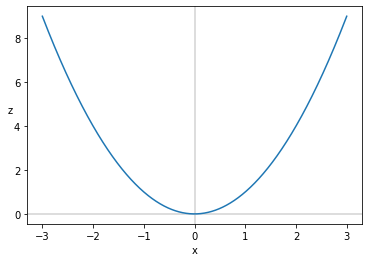

In [ ]:
fig, ax = plt.subplots()
plt.axvline(x=0, color='lightgray')
plt.axhline(y=0, color='lightgray')

plt.xlabel('x')
plt.ylabel('z', rotation=0)
_ = ax.plot(xs, zs_wrt_x)

To determine the slope of $z$ w.r.t. $x$ at a given point along the curve, we can use the partial derivative from the slides: $$ \frac{\partial z}{\partial x} = 2x$$

In [ ]:
def delz_delx(my_x, my_y): # y isn't relevant for *this* partial derivative; it often would be
    return 2*my_x

In [ ]:
x_samples = [-2, -1, 0, 1, 2]

In [ ]:
colors = ['red', 'orange', 'green', 'blue', 'purple']

In [ ]:
def point_and_tangent_wrt_x(my_xs, my_x, my_y, my_f, fprime, col):

    my_z = my_f(my_x, my_y) # z = f(x, y) 
    plt.scatter(my_x, my_z, c=col, zorder=3) 
    
    tangent_m = fprime(my_x, my_y) # Slope is partial derivative of f(x, y) w.r.t. x
    tangent_b = my_z - tangent_m*my_x # Line is z=mx+b, so b=z-mx
    tangent_line = tangent_m*my_xs + tangent_b
    
    plt.plot(my_xs, tangent_line, c=col, 
             linestyle='dashed', linewidth=0.7, zorder=3)

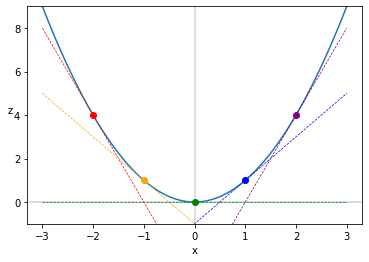

In [ ]:
fig, ax = plt.subplots()
plt.axvline(x=0, color='lightgray')
plt.axhline(y=0, color='lightgray')

for i, x in enumerate(x_samples):
    point_and_tangent_wrt_x(xs, x, 0, f, delz_delx, colors[i])

plt.ylim(-1, 9)
plt.xlabel('x')
plt.ylabel('z', rotation=0)
_ = ax.plot(xs, zs_wrt_x)

In [ ]:
#@title
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation
mpl.rc('animation', html='jshtml')
def show(axis="equal", ax=None, title=None, xlabel="$x$", ylabel="$y$"):
    ax = ax or plt.gca()
    ax.axis(axis)
    ax.grid()
    ax.set_title(title, fontsize=14)
    ax.set_xlabel(xlabel, fontsize=14)
    ax.set_ylabel(ylabel, fontsize=14, rotation=0)
    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')

def animate_tangent(f, fp, f_str):
    n_frames = 200
    x_min, x_max = -1000, 1000

    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(5, 8), sharex=True)

    # plot f
    xs = np.linspace(-2.1, 2.1, 500)
    ys = f(xs)
    ax1.plot(xs, ys)

    # plot tangent
    line_tangent, = ax1.plot([x_min, x_max], [0, 0])

    # plot f'
    xs = np.linspace(-2.1, 2.1, 500)
    ys = fp(xs)
    ax2.plot(xs, ys, "r-")

    # plot points A
    point_A1, = ax1.plot(0, 0, "bo")
    point_A2, = ax2.plot(0, 0, "bo")

    show([-2.1, 2.1, 0, 2.8], ax=ax1, ylabel="$f(x)$",
        title=r"$y=f(x)=" + f_str + "$ and the tangent at $x=x_\mathrm{A}$")
    show([-2.1, 2.1, -4.2, 4.2], ax=ax2, ylabel="$f'(x)$",
        title=r"y=f'(x) and the slope of the tangent at $x=x_\mathrm{A}$")

    def update_graph(i):
        x = 1.5 * np.sin(2 * np.pi * i / n_frames)
        f_x = f(x)
        df_dx = fp(x)
        offset = f_x - df_dx * x
        line_tangent.set_data([x_min, x_max],
                              [df_dx * x_min + offset, df_dx * x_max + offset])
        point_A1.set_data(x, f_x)
        point_A2.set_data(x, df_dx)
        return line_tangent, point_A1, point_A2

    anim = animation.FuncAnimation(fig, update_graph,
                                  init_func=lambda: update_graph(0),
                                  frames=n_frames,
                                  interval=20,
                                  blit=True)
    plt.close()
    return anim

def f(x):
  return x**2

def fp(x):
  return 2*x

animate_tangent(f, fp, "x^2")

Thereby visually demonstrating $\frac{\partial z}{\partial x} = 2x$. 

That is, the slope of $z$ along the $x$ axis is *twice* the $x$ value. 

##The Integrals

In [ ]:
from scipy.integrate import quad # "quadrature" = numerical integration (as opposed to symbolic)

From the slides: $$ \int_1^2 \frac{x}{2} dx = \frac{3}{4} $$

In [ ]:
def g(x):
    return x/2

In [ ]:
quad(g, 1, 2) 

(0.75, 8.326672684688674e-15)

The second output of `quad` is an estimate of the absolute error of the integral, which in this case is essentially zero.

**Return to the slides here.**

In [ ]:
def h(x):
    return 2*x

In [ ]:
quad(h, 3, 4)

(7.0, 7.771561172376096e-14)

# Partial derivatives

We have tried experiments with single variable $x$. Now let's start with a simple function with 2 variables: $f(x,y)=\sin(xy)$. If we plot this function, using $z=f(x,y)$, we get the following 3D graph. I also plotted some point $\mathrm{A}$ on the surface, along with two lines I will describe shortly.

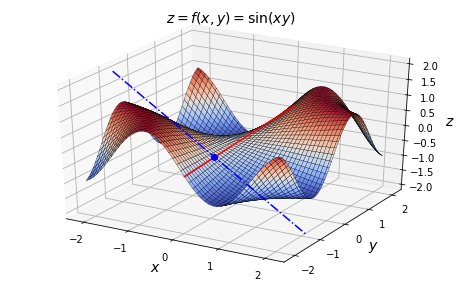

In [ ]:
#@title
from mpl_toolkits.mplot3d import Axes3D

def plot_3d(f, title):
    fig = plt.figure(figsize=(8, 5))
    ax = fig.add_subplot(111, projection='3d')

    xs = np.linspace(-2.1, 2.1, 100)
    ys = np.linspace(-2.1, 2.1, 100)
    xs, ys = np.meshgrid(xs, ys)
    zs = f(xs, ys)

    surface = ax.plot_surface(xs, ys, zs,
                              cmap=mpl.cm.coolwarm,
                              linewidth=0.3, edgecolor='k')

    ax.set_xlabel("$x$", fontsize=14)
    ax.set_ylabel("$y$", fontsize=14)
    ax.set_zlabel("$z$", fontsize=14)
    ax.set_title(title, fontsize=14)
    return ax

def plot_tangents(ax, x_A, y_A, f, df_dx, df_dy):
    ax.plot3D([x_A], [y_A], f(x_A, y_A), "bo", zorder=10)
    x_min, x_max = -2.1, 2.1
    slope_x = df_dx(x_A, y_A)
    offset_x = f(x_A, y_A) - slope_x * x_A
    ax.plot3D([x_min, x_max], [y_A, y_A],
              [slope_x * x_min + offset_x, slope_x * x_max + offset_x], "b-.",
              zorder=5)
    y_min, y_max = -2.1, 2.1
    slope_y = df_dy(x_A, y_A)
    offset_y = f(x_A, y_A) - slope_y * y_A
    ax.plot3D([x_A, x_A], [y_min, y_max],
              [slope_y * y_min + offset_y, slope_y * y_max + offset_y], "r-",
              zorder=5)

def f(x, y):
    return np.sin(x * y)

def df_dx(x, y):
    return y * np.cos(x * y)

def df_dy(x, y):
    return x * np.cos(x * y)

ax = plot_3d(f, r"$z = f(x, y) = \sin(xy)$")
plot_tangents(ax, 0.1, -1, f, df_dx, df_dy)

plt.show()

# Gradients

So far we have considered only functions with a single variable $x$, or with 2 variables, $x$ and $y$, but the previous paragraph also applies to functions with more variables. So let's consider a function $f$ with $n$ variables: $f(x_1, x_2, \dots, x_n)$. For convenience, we will define a vector $\mathbf{x}$ whose components are these variables:

$\mathbf{x}=\begin{pmatrix}
x_1\\
x_2\\
\vdots\\
x_n
\end{pmatrix}$ 

Now $f(\mathbf{x})$ is easier to write than $f(x_1, x_2, \dots, x_n)$.

The gradient of the function $f(\mathbf{x})$ at some point $\mathbf{x}_\mathrm{A}$ is the vector whose components are all the partial derivatives of the function at that point. It is noted $\nabla f(\mathbf{x}_\mathrm{A})$, or sometimes $\nabla_{\mathbf{x}_\mathrm{A}}f$:

$\nabla f(\mathbf{x}_\mathrm{A}) = \begin{pmatrix}
\dfrac{\partial f}{\partial x_1}(\mathbf{x}_\mathrm{A})\\
\dfrac{\partial f}{\partial x_2}(\mathbf{x}_\mathrm{A})\\
\vdots\\\
\dfrac{\partial f}{\partial x_n}(\mathbf{x}_\mathrm{A})\\
\end{pmatrix}$

### Gradient of vectors 

In mathematics we usually use the gradient term to generalize the derivative to higher dimensions. Mainly we define a real valued function with vector inputs as 

$$f: \mathbb{R}^n \to \mathbb{R} $$

Hence we could say $y = f(x)$ where $x = (x_1, x_2, \cdots, x_n)$ and $y \in \mathbb{R}$. Then we can define the derivative as 

$$\nabla f(x) = \left( \frac{ \partial y}{\partial x_1}, \frac{\partial y}{\partial x_2}, \cdots, \frac{\partial y}{\partial x_n}\right)$$
